<a href="https://colab.research.google.com/github/Adaline-K/git4-collaboration-sourcetree/blob/master/image_test01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import matplotlib.pylab as plt
import seaborn as sns
from sklearn.datasets import load_sample_images

dataset= load_sample_images()
img_rgb = dataset.images[1]
img_rgb.shape

(427, 640, 3)

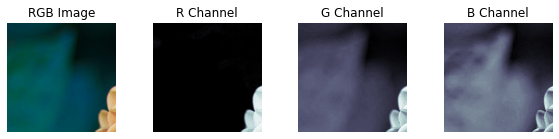

In [ ]:
plt.figure(figsize=(10,2))

plt.subplot(141)
plt.imshow(img_rgb[50:200, 50:200, :])
plt.axis("off")
plt.title("RGB Image")


plt.subplot(142)
plt.imshow(img_rgb[50:200, 50:200,0], cmap= plt.cm.bone)
plt.axis("off")
plt.title("R Channel")

plt.subplot(143)
plt.imshow(img_rgb[50:200, 50:200,1], cmap=plt.cm.bone)
plt.axis("off")
plt.title("G Channel")

plt.subplot(144)
plt.imshow(img_rgb[50:200, 50:200,2], cmap=plt.cm.bone)
plt.axis("off")
plt.title("B Channel")

plt.show()

In [ ]:
from matplotlib.colors import hsv_to_rgb

V, H = np.mgrid[0:1:100j, 0:1:360j]
S = np.ones_like(V)

HSV_S100 = np.dstack((H, S * 1.0, V))
RGB_S100 = hsv_to_rgb(HSV_S100)
HSV_S20 = np.dstack((H, S * 0.2, V))
RGB_S20 = hsv_to_rgb(HSV_S20)

HSV_S20.shape

(100, 360, 3)

In [ ]:
# 색상(Hue)
HSV_S20[:4, :5, 0]

array([[0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206]])

In [ ]:
# 채도(Saturation)
HSV_S20[:4, :5, 1]b

SyntaxError: ignored

In [ ]:
# 명도(Value)
HSV_S20[:4, :5, 2]

In [ ]:
plt.subplot(211)
plt.imshow(RGB_S100, origin="lower", extent=[0, 360, 0, 1], aspect=80)
plt.xlabel("색상(Hue)")
plt.ylabel("명도(Value)")
plt.title("채도(Saturation) 100일 때의 색공간")
plt.grid(False)

plt.subplot(212)
plt.imshow(RGB_S20, origin="lower", extent=[0, 360, 0, 1], aspect=80)
plt.xlabel("색상(Hue)")
plt.ylabel("명도(Value)")
plt.title("채도(Saturation) 20일 때의 색공간")
plt.grid(False)

plt.tight_layout()
plt.show()

In [ ]:
import PIL
PIL.__version__

In [ ]:
import skimage.data
img_astro= skimage.data.astronaut()
img_astro.shape

In [ ]:
skimage.io.imsave("astronaut.png", img_astro)
img_astro2 = skimage.io.imread("astronaut.png")

In [ ]:
from skimage import color

plt.subplot(131)
plt.imshow(img_astro) 
plt.axis("off")     
plt.title("RGB")

plt.subplot(132)
plt.imshow(color.rgb2gray(img_astro), cmap=plt.cm.gray)
plt.axis("off")
plt.title("GreyScale")


plt.subplot(133)
plt.imshow(color.rgb2hsv(img_astro))
plt.axis("off")
plt.title("HSV")

plt.show()

In [ ]:
#Threshold

import cv2
from skimage.data import coins

img = coins()

maxval=255
thresh= maxval /2

_, thresh1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TRUNC)
_, thresh4 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO)
_, thresh5 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO_INV)

titles=['Original', 'Binary', 'Binary_Inv', 'Trunc', 'Tozero', 'Tozero_inv']
images=[img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(9,5))
for i in range(6):
  plt.subplot(2,3, i+1), plt.imshow(images[i], 'gray')
  plt.title(titles[i], fontdict={'fontsize':10})
  plt.axis('off')

plt.tight_layout(pad=0.7)
plt.show()

In [ ]:
#적응임계처리: 일정한 영역 내 이웃한 픽셀들의 값들을 이용하여 해당 영역에 적용할 기준값 자체적 계산

from skimage.data import page

img =page()

maxval = 255
thresh = 126
ret, th1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)

k=15
c=20

th2 = cv2.adaptiveThreshold(
    img, maxval, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, k,c)
th3 = cv2.adaptiveThreshold(
    img, maxval, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, k,c)

images= [img, th1, th2, th3]
titles = ['Original', 'Threshold', 'Mean adaptiveThreshold', 'Gaussian adaptiveThreshold']

plt.figure(figsize =(8,5))
for i in range(4):
  plt.subplot(2,2, i+1)
  plt.imshow(images[i], 'gray')
  plt.title(titles[i])
  plt.axis('off')

plt.tight_layout()
plt.show()

# **Image Filtering**

In [ ]:
import cv2
from skimage.data import astronaut

img = astronaut()
img=cv2.resize(img, dsize=(150, 150))

plt.figure(figsize=(8,3))
for i, k in enumerate([2,6,11]):
  kernel = np.ones((k,k)) /k**2
  filtering = cv2.filter2D(img, -1, kernel)
  plt.subplot(1, 3, i+1)
  plt.imshow(filtering)
  plt.title("Kennel Size {}".format(k))
  plt.axis("off")

plt.show()

#커널 싸이즈가 커지면서 이미지가 흐려짐

In [ ]:
#blur-이미지 필터링을 사용하여 이미지를 흐르게 만드는 것 노이즈를 제거하거나 경계선을 흐리게 함
#평균블러/중앙값 블러/가우시안 블러/양방향 블러
#blur(src, ksize) -ksize:커널싸이즈

blur=cv2.blur(img, (3,3))
boxfilter = cv2.boxFilter(img, -1, (3,3))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(blur)
plt.title("blur")
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
#중앙값 블러(medianBlur)
#medianBlur(src, ksize)

img_noise = img.copy()

#점잡음 적용
np.random.seed(0)
N=500
idx1 = np.random.randint(img.shape[0], size=N)
idx2 = np.random.randint(img.shape[1], size=N)
img_noise[idx1, idx2]=255

#중앙값 블러로 잡음 제거
img_denoise = cv2.medianBlur(img_noise, 3)

plt.subplot(1,2,1)
plt.imshow(img_noise)
plt.title("noised image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_denoise)
plt.title("median blured image")
plt.axis('off')
plt.show()

[[0.00011494 0.0001429  0.00017688 0.00021797 0.00026742 0.00032663
  0.00039718 0.00048082 0.00057949 0.00069532 0.00083061 0.00098781
  0.00116955 0.0013786  0.0016178  0.00189009 0.00219841 0.00254569
  0.00293475 0.00336828 0.0038487  0.00437814 0.00495832 0.00559049
  0.00627531 0.00701278 0.00780216 0.00864191 0.00952958 0.01046184
  0.01143436 0.01244187 0.01347812 0.01453592 0.01560723 0.01668318
  0.01775422 0.01881023 0.01984068 0.02083477 0.02178164 0.02267057
  0.02349114 0.02423346 0.02488838 0.02544764 0.02590409 0.02625179
  0.02648618 0.02660416 0.02660416 0.02648618 0.02625179 0.02590409
  0.02544764 0.02488838 0.02423346 0.02349114 0.02267057 0.02178164
  0.02083477 0.01984068 0.01881023 0.01775422 0.01668318 0.01560723
  0.01453592 0.01347812 0.01244187 0.01143436 0.01046184 0.00952958
  0.00864191 0.00780216 0.00701278 0.00627531 0.00559049 0.00495832
  0.00437814 0.0038487  0.00336828 0.00293475 0.00254569 0.00219841
  0.00189009 0.0016178  0.0013786  0.00116955 0.

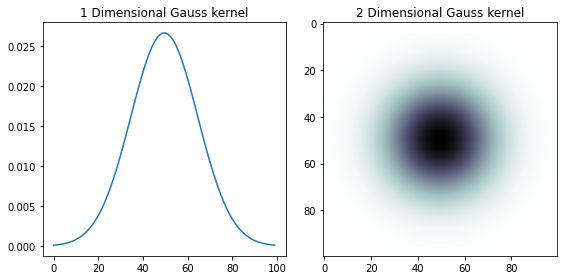

In [ ]:
#Gaussian Blur
#가우시안 함수 G를 커널로 사용
import matplotlib as mpl

gauss1d = cv2.getGaussianKernel(100, 15)
print(gauss1d.T)
gauss2d = gauss1d @ gauss1d.T
print(gauss2d)

plt.figure(figsize = (8,4))

plt.subplot(121)
plt.plot(gauss1d)
plt.grid(False)
plt.title("1 Dimensional Gauss kernel")

plt.subplot(122)
plt.imshow(gauss2d, cmap=mpl.cm.bone_r)
plt.grid(False)
plt.title('2 Dimensional Gauss kernel')

plt.tight_layout()
plt.show()

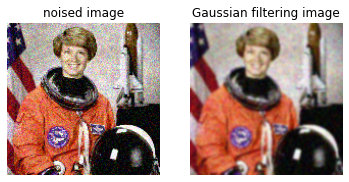

In [ ]:
#GaussianBlur(src, ksize, sigmax)
#원본, 커널크기, 표준편차

#백색잡음
img_noise = np.clip((img /255 + np.random.normal(scale =0.1, size = img.shape)) * 255, 0, 255).astype('uint8')

#가우시안 블러로 잡음 제거
img_denoise = cv2.GaussianBlur(img_noise, (9,9),1)

plt.subplot(1, 2, 1)
plt.imshow(img_noise)
plt.title("noised image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_denoise)
plt.title("Gaussian filtering image")
plt.axis('off')

plt.show()

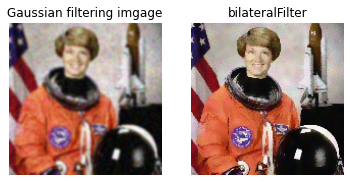

In [ ]:
#양방향 필터링(Bilateral Filtering)
#가우시안 필터링은 경계선도 흐려지지만, 양방향 필터링은 영역사이의 경계선이 잘 보존됨
#bilateralFilter(src, d, sigmaColor, sigmaSpace)
#원본이미지, 커널크기, 색공간 표준편차, 거리공간 표준편차

img_denoise1= cv2.GaussianBlur(img_noise, (9,9), 1)
img_denoise2 = cv2.bilateralFilter(img_noise, 9,75, 75)

plt.subplot(1,2,1)
plt.imshow(img_denoise1)
plt.title("Gaussian filtering imgage")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_denoise2)
plt.title("bilateralFilter")
plt.axis('off')

plt.show()


In [ ]:
#형태학적 영역(morphological region)
#이진화된 이미지에서 같은 값을 가진 픽셀이 이웃하여 있으면 이를 형태학적 영역으로 생각

#getStructuringElement 함수

cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [ ]:
cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [ ]:
cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5)) #십자형

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

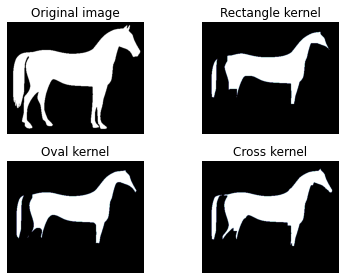

In [ ]:

#침식기법: 각 픽셀테 커널을 적용하여 커널 영역 내의 최솟값으로 해당 픽셀 대체
#검은색 0, 흰색 1
#erode(src, kernel)

from skimage.data import horse

img=horse().astype('uint8')
img= np.ones(img.shape)- img

ksize = (20, 20)
kernel={}
kernel[0] = cv2.getStructuringElement(cv2.MORPH_RECT, ksize)
kernel[1] = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize)
kernel[2] = cv2.getStructuringElement(cv2.MORPH_CROSS, ksize)
title =["Rectangle kernel", "Oval kernel", "Cross kernel"]

plt.subplot(2,2,1)
plt.imshow(img, cmap ="gray")
plt.title("Original image")
plt.axis('off')

for i in range(3):
  erosion = cv2.erode(img, kernel[i])
  plt.subplot(2,2,i+2)
  plt.imshow(erosion, cmap='bone')
  plt.title(title[i])
  plt.axis('off')
plt.tight_layout()
plt.show()


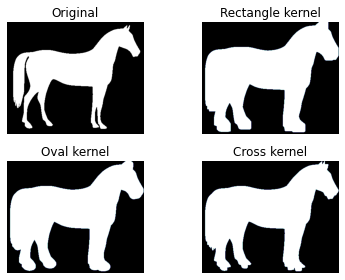

In [ ]:
#팽창(Dilation): 커널 영역내의 최댓값으로 해당 픽셀을 대체
#dilate(src, kernel)

plt.subplot(2,2,1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.axis('off')

for i in range(3):
  erosion = cv2.dilate(img, kernel[i])
  plt.subplot(2,2, i+2)
  plt.imshow(erosion, cmap='bone')
  plt.title(title[i])
  plt.axis('off')
plt.tight_layout()
plt.show()

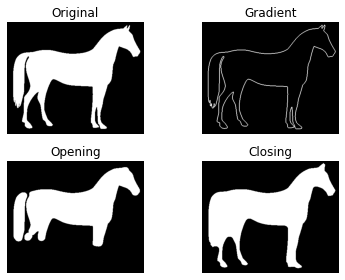

In [ ]:
#Gradient, Openning, Closing
#morphologyEx(src, op, kernel)
#Openning-침식을 적용한 뒤 팽창 적용
#Closing-팽창을 적용한 뒤 침식 적용

opening= cv2.morphologyEx(img, cv2.MORPH_OPEN,
                       cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
)
closing= cv2.morphologyEx(img, cv2.MORPH_CLOSE,
                         cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
)
gradient= cv2.morphologyEx(img, cv2.MORPH_GRADIENT,
                         cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
)
images= [img, gradient, opening, closing]
titles=["Original", 'Gradient', 'Opening', 'Closing']

for i in range(4):
  plt.subplot(2, 2, i+1)
  plt.imshow(images[i], cmap='gray')
  plt.title(titles[i])
  plt.axis('off')

plt.tight_layout()
plt.show()